# Preparing Time Series from Wide-Form Data
Brittany Lassiter

**I will be working with Zillow's publicly available Zillow House Value Index (ZHVI)**

## Objectives

- Prepare the dataset for time series analysis
- Prepared the dataframe with the time series data for the 4 largest cities
- Answer the questions using pandas

# Part 1: Import and prepare Data

## Imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns

url ="Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month - City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
df = pd.read_csv(url)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


## Filtering 4 largest cities

In [2]:
filter_df_0 = df["SizeRank"] >=0
filter_df_3 = df["SizeRank"] <= 3 

larger4_df = df[filter_df_0 & filter_df_3]
larger4_df["SizeRank"].value_counts()

0    1
1    1
2    1
3    1
Name: SizeRank, dtype: int64

In [3]:
larger4_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


## Melt the data to long-form and prepare it for time series analysis

In [4]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [5]:
#Melting wide form into long form
larger4_df = pd.melt(larger4_df.drop(columns = ["RegionID", "SizeRank", "RegionType", "StateName",
                                         "State", "Metro", "CountyName"]), id_vars=["RegionName"],
                  value_name="Value",var_name="Date")
larger4_df

,RegionName,Date,Value
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [6]:
larger4_df["Date"] = pd.to_datetime(larger4_df["Date"])

In [7]:
#Setting date as index
larger4_df = larger4_df.set_index("Date")
larger4_df.head()

,RegionName,Value
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0


In [8]:
larger4_df = larger4_df.groupby("RegionName").resample("MS").sum()
larger4_df

C:\Users\blass\AppData\Local\Temp\ipykernel_17860\3354099590.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  larger4_df = larger4_df.groupby("RegionName").resample("MS").sum()


Value
RegionName Date                
Chicago    2000-01-01  166139.0
           2000-02-01  166536.0
           2000-03-01  167368.0
           2000-04-01  168826.0
           2000-05-01  170499.0
...                         ...
New York   2022-05-01  768797.0
           2022-06-01  773944.0
           2022-07-01  777692.0
           2022-08-01  779960.0
           2022-09-01  781622.0

[1092 rows x 1 columns]

# Part 2: Prepare data and Answer Questions

In [9]:
unstacked = larger4_df.unstack(level=0)
unstacked

Value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

## **Q1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?**

In [10]:
def thousands(x, pos):
    return '$%1.1fK' % (x*1e-3)

Text(0.5, 0, 'Year')

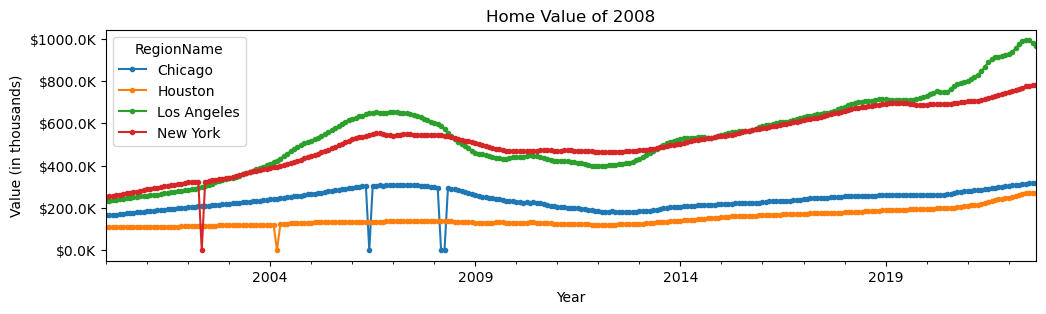

In [11]:
fig, ax = plt.subplots(figsize = (12,3))
ax = unstacked["Value"].plot(ax = ax, marker = ".")

ax.yaxis.set_major_formatter(FuncFormatter(thousands))

ax.set_title("Home Value of 2008")
ax.set_ylabel("Value (in thousands)")
ax.set_xlabel("Year")

In [12]:
df_2008 = unstacked.copy()
df_2008["2008-12"]

C:\Users\blass\AppData\Local\Temp\ipykernel_17860\116495331.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2008["2008-12"]


Value                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-12-01  265306.0  131283.0    469294.0  510309.0

**-The highest typical home value was New York for 510309.00. The lowest home value was Houston for about 131283.00.**

## Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?

In [13]:
df_diff = unstacked.copy()df_diff = df_diff["2008"]
df_diff.diff()

C:\Users\blass\AppData\Local\Temp\ipykernel_17860\1967055831.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_diff = df_diff["2008"]


Value                             
RegionName   Chicago Houston Los Angeles New York
Date                                             
2008-01-01       NaN     NaN         NaN      NaN
2008-02-01   -4144.0  -696.0     -6394.0   -440.0
2008-03-01 -296063.0  -717.0    -10570.0  -1536.0
2008-04-01       0.0  -167.0    -14839.0  -2697.0
2008-05-01  293467.0  -400.0    -16637.0  -4180.0
2008-06-01   -4972.0  -455.0    -14967.0  -3875.0
2008-07-01    -321.0  -381.0    -15402.0  -4599.0
2008-08-01   -4975.0  -622.0    -13700.0  -3921.0
2008-09-01   -2504.0  -838.0    -10396.0  -3943.0
2008-10-01   -5846.0  -743.0     -9145.0  -3299.0
2008-11-01   -3790.0  -942.0     -9074.0  -3281.0
2008-12-01   -5753.0  -964.0    -12611.0  -4458.0

**-All markets have decresses in value. Chicago's difference was by 5753, Houston differnece was by 964, LA difference was by 12611, and NY difference was by 4458.**